In [1]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 44.3MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from  google.colab import drive

In [0]:
from fastai.vision import *


In [5]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = 'gdrive/My Drive/Colab Notebooks/cricket_ball_classification/'

In [7]:
import os
os.listdir(root_path)

['balls', 'test', 'Cricketball_classification.ipynb']

In [0]:
proj_path = root_path + str("balls/")

In [9]:
proj_path

'gdrive/My Drive/Colab Notebooks/cricket_ball_classification/balls/'

In [10]:
os.listdir(proj_path)

['tennis_ball', 'dues_ball', 'models']

In [0]:
path = Path(proj_path)

In [12]:
doc(ImageDataBunch)

In [0]:
bs = 16 #Batch Size

In [0]:
import numpy as np
np.random.seed(52)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=150, num_workers=4,bs = bs).normalize(imagenet_stats)

In [22]:
data.classes,data.c

(['dues_ball', 'tennis_ball'], 2)

In [23]:
len(data.train_ds),len(data.valid_ds)

(45, 11)

In [24]:
doc(ImageDataBunch.show_batch)

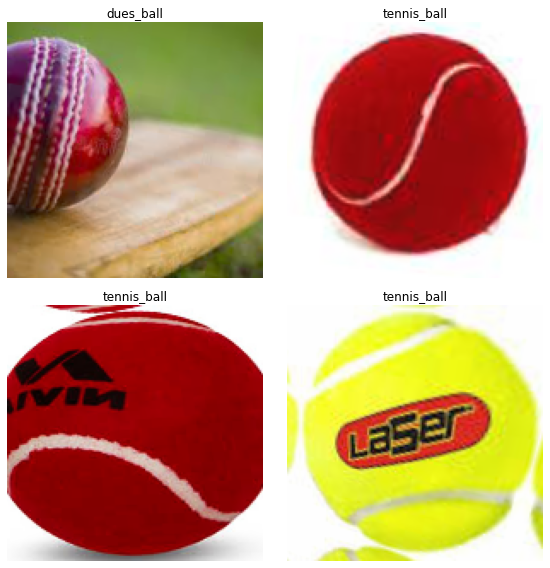

In [25]:
data.show_batch(rows=2)

In [26]:
type(data)

fastai.vision.data.ImageDataBunch

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [28]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.633155,0.501282,0.181818,00:01
1,0.980392,0.089377,0.090909,00:00


In [29]:
learn.save('model_1', return_path=True)

PosixPath('gdrive/My Drive/Colab Notebooks/cricket_ball_classification/balls/models/model_1.pth')

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


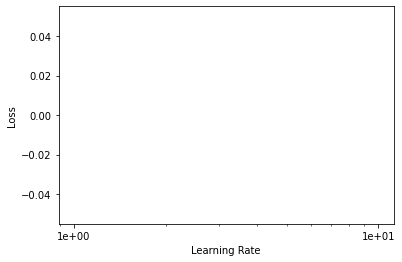

In [31]:
learn.lr_find()
learn.recorder.plot()

In [32]:
learn.load('model_1')
interp = ClassificationInterpretation.from_learner(learn)

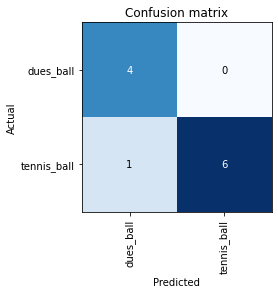

In [33]:
interp.plot_confusion_matrix()

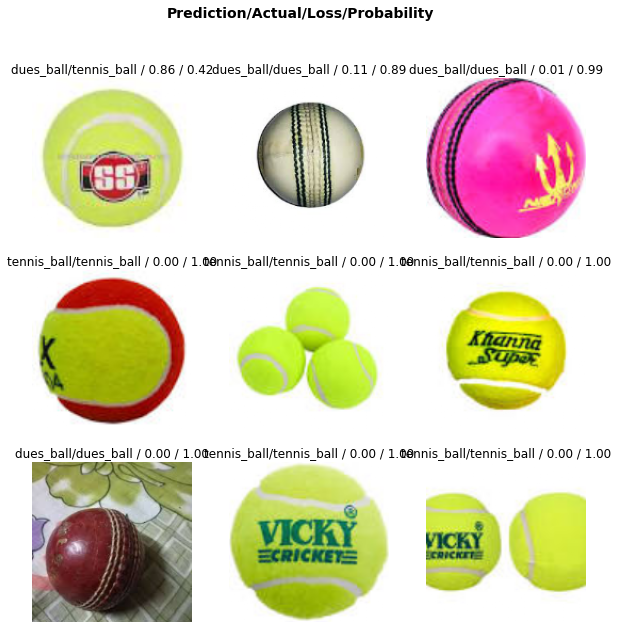

In [34]:
interp.plot_top_losses(9, figsize=(10,10))

In [35]:
interp.most_confused(min_val = 1)

[('tennis_ball', 'dues_ball', 1)]

In [48]:
classes = data.classes
type(classes)

list

In [40]:
doc(learn.predict)

In [0]:
tennis_ball = open_image(Path(root_path)/'test'/'tennisball1.jpg')

In [50]:
pred_class,pred_idx,outputs = learn.predict(tennis_ball)
classes[int(pred_class)]

'tennis_ball'

In [0]:
dues_ball = open_image(Path(root_path)/'test'/'dues_ball2.jpg')

In [52]:
pred_class,pred_idx,outputs = learn.predict(dues_ball)
classes[int(pred_class)]

'dues_ball'